In [1]:
from service_loader import sys_append_abs, Path
sys_append_abs()
from detection.services.service import get_image, visualize_bbox, convertFromJson, convertToXYmax

In [2]:
import os
import glob
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [3]:
ROOT = Path('__file__').resolve().parents[2]

In [4]:
content_path = glob.glob(os.path.join(ROOT, 'data/content/*'))
content_path

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/05.07-22.08',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/5 Otabek 06.21',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/13082022',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/1',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/2',
 '/root/w

In [5]:
list_train = glob.glob(os.path.join(ROOT, 'data/content/*/*.csv'))
list_train

['/root/workspace/work/Digital-Tashkent/Signs/data/content/23.06.2022/23.06.2022 tr_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/6 Otabek 06.21/Example_Project_Attributes_included_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/27062022/27062022_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 from 00010F_4 .csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/28.06.2022 full/28062022 to 00010F_4.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/3/khakimov- sign project 3_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/19.07.2022/19_07_22_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/30062022/30.06.22 (113415, 115029, 123930)_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/15082022/15.08.2022 full_csv.csv',
 '/root/workspace/work/Digital-Tashkent/Signs/data/content/7 Otabek 06.21/Example_Project_Attributes_

In [ ]:
# def splitter(item):
#     return item.split(':')[-1].split('}')[0]
# df = pd.read_csv(list_train[-1])
# df.reset_index(inplace=True)
# df.drop(['level_1', 'level_2', 'level_3', 'level_4', 'filename'], inplace=True, axis=1)
# df.columns = ['filename', 'x', 'y', 'width', 'height', 'Name', 'Type']
# for col in df.columns:
#     df[col] = df[col].apply(splitter)
# df.to_csv(list_train[-1])

In [6]:
def get_crop(img, bbox):
    return img[bbox[1]:bbox[3], bbox[0]:bbox[2]]

def wrapper(pth):
    def root2path(item):
        return os.path.join(pth, item)
    return root2path

def joiner(csv_item):
    data = pd.read_csv(csv_item)
    pth = '/'.join(csv_item.split('/')[:-1])
    data = convertFromJson(data)
    data = convertToXYmax(data)
    data['image'] = data['image'].apply(wrapper(pth))
    return data

/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:68: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)[['filename','height','width','x','y', 'Name', 'Type']]
/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:82: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


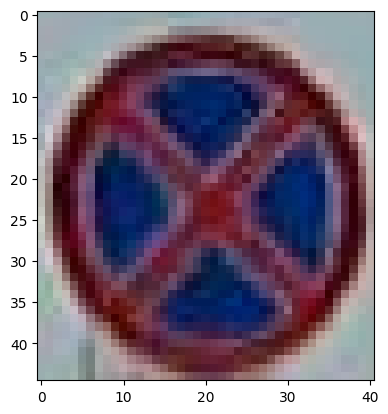

In [62]:
# 18 trash file
index = 17
data = joiner(list_train[index])
im, bbox = get_image(data, index)
bbox = list(map(int, bbox))
plt.imshow(get_crop(im, bbox))

In [63]:
data.head()

,image,xmin,ymin,xmax,ymax,name,class
0,/root/workspace/work/Digital-Tashkent/Signs/da...,1847.0,546.0,1906.0,608.0,5.17.1,Informational_sign
1,/root/workspace/work/Digital-Tashkent/Signs/da...,1718.0,597.0,1776.0,661.0,3.27,Forbidding_sign
2,/root/workspace/work/Digital-Tashkent/Signs/da...,1717.0,659.0,1783.0,696.0,7.21,Additional_info_sign
3,/root/workspace/work/Digital-Tashkent/Signs/da...,2086.0,509.0,2177.0,622.0,3.27,Forbidding_sign
4,/root/workspace/work/Digital-Tashkent/Signs/da...,2089.0,618.0,2190.0,685.0,7.21,Additional_info_sign


In [64]:
data = pd.read_csv(list_train[-1])
data = data.drop(data.columns[0], axis=1)
data.head()

,filename,x,y,width,height,Name,Type
0,NO20220622-110621-000005F_1.jpg,731,700,59,64,5.16.1,Prescriptive_sign
1,NO20220622-110621-000005F_1.jpg,1822,717,49,50,5.16.2,Prescriptive_sign
2,NO20220622-110621-000005F_1.jpg,1814,658,55,56,2.1,Priority_sign
3,NO20220622-110621-000005F_2.jpg,322,587,72,96,5.16.1,Prescriptive_sign
4,NO20220622-110621-000005F_2.jpg,2181,639,52,75,5.16.2,Prescriptive_sign


In [66]:
data = convertToXYmax(data)
data.head()

/root/workspace/work/Digital-Tashkent/Signs/traffic-sign-recognition/detection/services/service.py:82: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  data = pd.concat([data, datadf, datadf2],1)


,image,xmin,ymin,xmax,ymax,name,class
0,NO20220622-110621-000005F_1.jpg,731,700,790,764,5.16.1,Prescriptive_sign
1,NO20220622-110621-000005F_1.jpg,1822,717,1871,767,5.16.2,Prescriptive_sign
2,NO20220622-110621-000005F_1.jpg,1814,658,1869,714,2.1,Priority_sign
3,NO20220622-110621-000005F_2.jpg,322,587,394,683,5.16.1,Prescriptive_sign
4,NO20220622-110621-000005F_2.jpg,2181,639,2233,714,5.16.2,Prescriptive_sign
